In [98]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

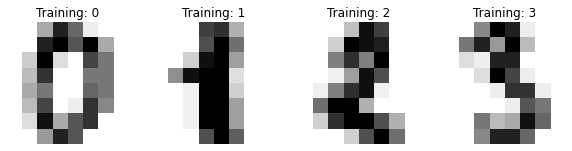

In [99]:
# Digits dataset
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [100]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.7, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

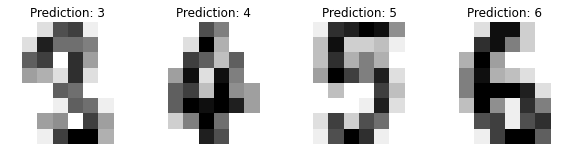

In [101]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [102]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       123
           1       0.95      0.97      0.96       127
           2       0.98      0.97      0.98       122
           3       0.98      0.91      0.94       128
           4       0.98      0.96      0.97       128
           5       0.94      0.96      0.95       128
           6       0.99      0.98      0.98       128
           7       0.96      1.00      0.98       126
           8       0.93      0.93      0.93       121
           9       0.90      0.94      0.92       127

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258




Confusion matrix:
[[122   0   0   0   1   0   0   0   0   0]
 [  0 123   1   0   0   1   0   0   2   0]
 [  0   0 118   1   0   0   0   1   0   2]
 [  0   0   0 116   0   3   0   3   6   0]
 [  0   0   0   0 123   0   0   1   0   4]
 [  0   0   0   0   1 123   1   0   0   3]
 [  1   1   0   0   0   1 125   0   0   0]
 [  0   0   0   0   0   0   0 126   0   0]
 [  0   3   1   0   0   1   0   0 112   4]
 [  0   3   0   1   0   2   0   0   1 120]]


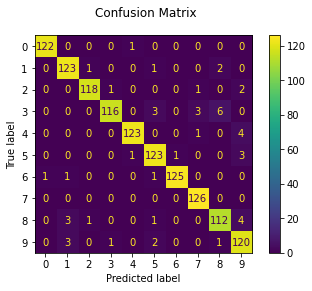

In [103]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Aplicar um limiar de f(x,y ) > 5: f(x,y) = 255, senão f(x,y) = 0. 

In [104]:
digits = datasets.load_digits()

In [105]:
import numpy as np

digitsCopy = np.copy(digits.data)

for i in range(len(digitsCopy)):
  for j in range(len(digitsCopy[i])):
    if (digitsCopy[i][j] > 5):
        digitsCopy[i][j] = 255
    else:
      digitsCopy[i][j] = 0

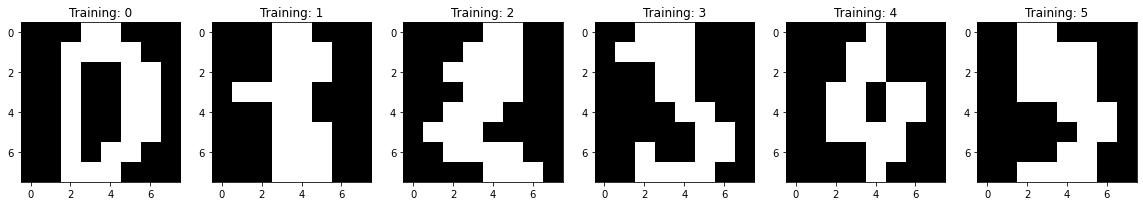

In [106]:
plt.figure(figsize=(20,8))
for index, (image, label) in enumerate(zip(digitsCopy[0:6], digits.target[0:6])):
    plt.subplot(1,6, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i' % label)

In [107]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digitsCopy, digits.target, test_size=0.3, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

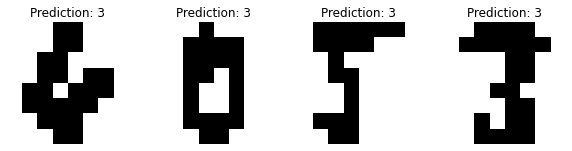

In [108]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [109]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       1.00      0.23      0.37        53
           2       1.00      0.02      0.04        53
           3       0.10      1.00      0.18        53
           4       0.00      0.00      0.00        57
           5       1.00      0.02      0.04        56
           6       1.00      0.04      0.07        54
           7       1.00      0.02      0.04        54
           8       1.00      0.02      0.04        52
           9       0.00      0.00      0.00        55

    accuracy                           0.13       540
   macro avg       0.61      0.13      0.08       540
weighted avg       0.61      0.13      0.08       540




C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[ 0  0  0 53  0  0  0  0  0  0]
 [ 0 12  0 41  0  0  0  0  0  0]
 [ 0  0  1 52  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  0  0  0  0]
 [ 0  0  0 55  0  1  0  0  0  0]
 [ 0  0  0 52  0  0  2  0  0  0]
 [ 0  0  0 53  0  0  0  1  0  0]
 [ 0  0  0 51  0  0  0  0  1  0]
 [ 0  0  0 55  0  0  0  0  0  0]]


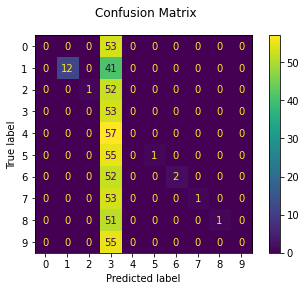

In [110]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Conclusão

Através da leitura dos resultados obtidos o modelo treinado após a aplicação do limiar teve uma acurácia menor em relação ao modelo original, pois os tons de cinza se transformaram em valores de cores brancos e pretos, perdendo as informações das imagens originais.